In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
catalog = np.loadtxt("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2012z/acs_all.dolphot.dat")

In [3]:
pos_predict = np.zeros((catalog.shape[0],2))
info_predict = np.zeros(np.shape(catalog))

j = 0 # Iteration variable for positions array
for i in range(catalog.shape[0]): # Cycles through each object in catalog
    # Checks to make sure point is "good"
    # Good defined by: 1. S/N > 3     2. Sharpness < .25     3. Roundness < 1     4. Crowding < .5 
    #                  5. Object type = "Bright Star"     6. ML algorithm picks as good
    if ((catalog[i][5] >= 3)&(abs(catalog[i][6]) < .3)&(abs(catalog[i][7]) < 1)
        &(catalog[i][9] < .5)):
        pos_predict[j][0] = catalog[i][2] # Assigns X position
        pos_predict[j][1] = catalog[i][3] # Assigns Y position
        info_predict[j] = catalog[i]
        j = j + 1
                
# Trims all zeros from end of positions array, left from "bad" objects
pos_predict = pos_predict[~np.all(pos_predict == 0, axis=1)]
info_predict = info_predict[~np.all(info_predict == 0, axis=1)]

# Saves high S/N object X,Y positions
np.savetxt("New_Start(2017)/sn2012z_Prediction.reg", pos_predict, '%5.2f')

# Load in stars in ROI and produce isochrone CMDs

In [4]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2012z_200pc.reg", "r+")

def mysplit(s, delim=None):
    return [x for x in s.split(delim) if x]

text = asci.readlines()
region = np.zeros([45,2])
for i in range(45):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

# Info for each star chosen as real 
infoF3 = np.zeros([region.shape[0],info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(info_predict.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == pos_predict[i][0])&(region[j][1] == pos_predict[i][1]):
        infoF3[j] = info_predict[i]
        j = j + 1
        if j == region.shape[0]: break

In [5]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2012z_133pc.reg", "r+")

text = asci.readlines()
region = np.zeros([19,2])
for i in range(19):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

infoF2 = np.zeros([region.shape[0], info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(infoF3.shape[0]): # Cycles through each star predicted above
    if np.array_equal(region[j],infoF3[i][2:4]):
        infoF2[j] = infoF3[i]
        j = j + 1
        if j == region.shape[0]: break

In [6]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2012z_67pc.reg", "r+")

text = asci.readlines()
region = np.zeros([4,2])
for i in range(4):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

infoF1 = np.zeros([region.shape[0], info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(infoF2.shape[0]): # Cycles through each star predicted above
    if np.array_equal(region[j],infoF2[i][2:4]):
        infoF1[j] = infoF2[i]
        j = j + 1
        if j == region.shape[0]: break

[-1, 4, 30, 25]

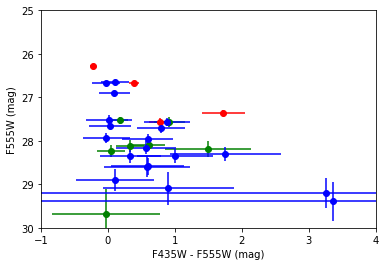

In [7]:
for i in range(infoF3.shape[0]):
    for j in range(infoF2.shape[0]):
        if np.array_equal(infoF3[i],infoF2[j]):
            infoF3[i] = np.zeros(infoF3[i].size)
for i in range(infoF2.shape[0]):
    for j in range(infoF1.shape[0]):
        if np.array_equal(infoF2[i],infoF1[j]):
            infoF2[i] = np.zeros(infoF2[i].size)

infoF2 = infoF2[~np.all(infoF2 == 0, axis=1)]
infoF3 = infoF3[~np.all(infoF3 == 0, axis=1)]
# F555W vs F435W - F555W
F435W_F1 = infoF1[:,15]
xerr_F1 = np.sqrt(infoF1[:,17]**2 + infoF1[:,30]**2)
F555W_F1 = infoF1[:,28]
yerr_F1 = infoF1[:,30]

F435W_F2 = infoF2[:,15]
xerr_F2 = np.sqrt(infoF2[:,17]**2 + infoF2[:,30]**2)
F555W_F2 = infoF2[:,28]
yerr_F2 = infoF2[:,30]

F435W_F3 = infoF3[:,15]
xerr_F3 = np.sqrt(infoF3[:,17]**2 + infoF3[:,30])
F555W_F3 = infoF3[:,28]
yerr_F3 = infoF3[:,30]

line1 = plt.errorbar(F435W_F1 - F555W_F1, F555W_F1, fmt='ro', xerr=xerr_F1, yerr=yerr_F1)
line2 = plt.errorbar(F435W_F2 - F555W_F2, F555W_F2, fmt='go', xerr=xerr_F2, yerr=yerr_F2)
line3 = plt.errorbar(F435W_F3 - F555W_F3, F555W_F3, fmt='bo', xerr=xerr_F3, yerr=yerr_F3)

#plt.plot(F435W_F1 - F555W_F1, F555W_F1, 'ro', F435W_F2 - F555W_F2, F555W_F2, 'go', F435W_F3 - F555W_F3, F555W_F3, 'bo')
plt.gca().invert_yaxis()
plt.xlabel('F435W - F555W (mag)')
plt.ylabel('F555W (mag)')
plt.axis([-1,4,30,25])

[-1, 3, 30, 25]

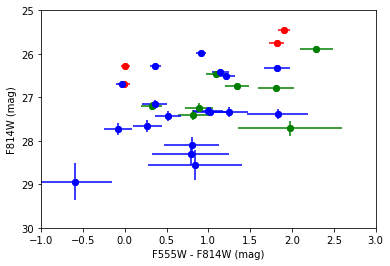

In [8]:
xerr2_F1 = np.sqrt(infoF1[:,43]**2 + infoF1[:,30]**2)
F814W_F1 = infoF1[:,41]
yerr2_F1 = infoF1[:,43]

xerr2_F2 = np.sqrt(infoF2[:,43]**2 + infoF2[:,30]**2)
F814W_F2 = infoF2[:,41]
yerr2_F2 = infoF2[:,43]

xerr2_F3 = np.sqrt(infoF3[:,43]**2 + infoF3[:,30]**2)
F814W_F3 = infoF3[:,41]
yerr2_F3 = infoF3[:,43]

line1 = plt.errorbar(F555W_F1 - F814W_F1, F814W_F1, fmt='ro', xerr=xerr2_F1, yerr=yerr2_F1)
line2 = plt.errorbar(F555W_F2 - F814W_F2, F814W_F2, fmt='go', xerr=xerr2_F2, yerr=yerr2_F2)
line3 = plt.errorbar(F555W_F3 - F814W_F3, F814W_F3, fmt='bo', xerr=xerr2_F3, yerr=yerr2_F3)


plt.plot(F555W_F1 - F814W_F1, F814W_F1, 'ro', F555W_F2 - F814W_F2, F814W_F2, 'go', F555W_F3 - F814W_F3, F814W_F3, 'bo')
plt.gca().invert_yaxis()
plt.xlabel('F555W - F814W (mag)')
plt.ylabel('F814W (mag)')
plt.axis([-1,3,30,25])

In [9]:
import os
import glob
import matplotlib as mpl

mist_dir = "/Users/tktakaro/Documents/Type-Iax-HST/MIST_v1.0_HST_ACSWF"
# All of this MIST isochrone code comes from Asher

In [10]:
kwargs = {"names": ["EEP", "log10_isochrone_age_yr", "initial_mass", "log_Teff", "log_g",
                    "log_L", "z_surf", "ACS_WFC_F435W", "ACS_WFC_F475W", "ACS_WFC_F502N",
                    "ACS_WFC_F550M", "ACS_WFC_F555W", "ACS_WFC_F606W", "ACS_WFC_F625W", 
                    "ACS_WFC_F658N", "ACS_WFC_F660N", "ACS_WFC_F775W", "ACS_WFC_F814W",
                    "ACS_WFC_F850LP", "ACS_WFC_F892N", "phase"],
         "delim_whitespace": True, "comment": "#"}
isochrones = {}
for filename in glob.glob(mist_dir + "/*.iso.cmd"):
    feh_string = filename.split("/")[-1].split("_")[3] # Pulls metalicity information
    if feh_string[0] == "p":
        feh = float(feh_string[1:]) # feh is [Fe/H]
    elif feh_string[0] == "m":
        feh = -float(feh_string[1:])
    else:
        raise ValueError
    df = pandas.read_csv(filename, **kwargs)
    df['ages'] = 10 ** df.log10_isochrone_age_yr / 1e9
    isochrones[feh] = df # Creates dictionary accessible by entering a particular metalicity

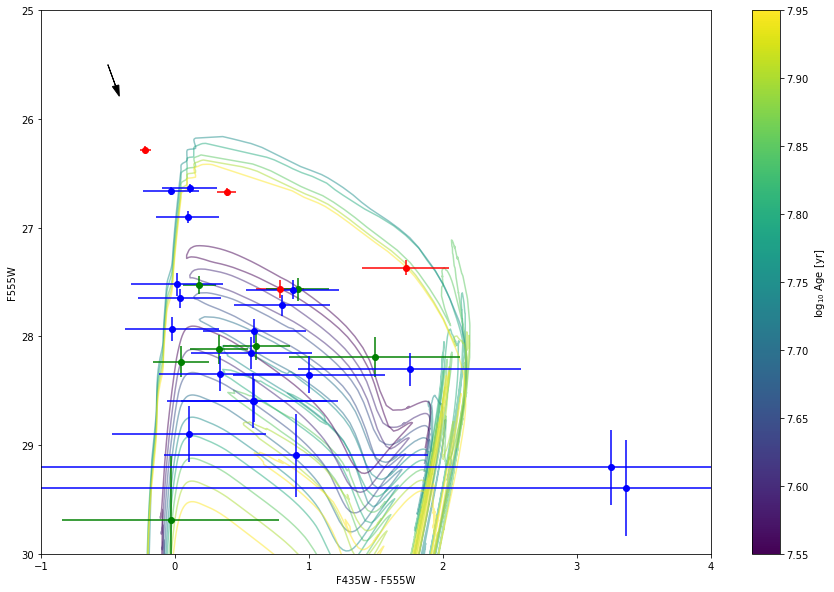

In [11]:
# fix metallicity, vary age
df = isochrones[0]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}

ages = ages[(ages > 7.5) & (ages < 8)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Three adjustments: 1. Distance: added to mag 2. MW Extinction: added to both. 3. Galactic extinction
    dist_adjust = 5 * (np.log10(31.96e6) - 1)
    F435W_ext = 0.144 # extinction in F435W in NGC 1309 from NED
    F555W_ext = 0.112 # extinction in F555W in NGC 1309 from NED
    Gal_ext = 0.07
    # Multiply Gal_ext by A_lambda/E(B-V) values from Schlafly, Finkbeiner 2011
    mag = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    color = df[idx].ACS_WFC_F435W - df[idx].ACS_WFC_F555W  + F435W_ext - F555W_ext + (3.610 - 2.792) * Gal_ext
    age_cmd[age] = (color, mag)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
# Plots stars
line1 = plt.errorbar(F435W_F1 - F555W_F1, F555W_F1, fmt='ro', xerr=xerr_F1, yerr=yerr_F1)
line2 = plt.errorbar(F435W_F2 - F555W_F2, F555W_F2, fmt='go', xerr=xerr_F2, yerr=yerr_F2)
line3 = plt.errorbar(F435W_F3 - F555W_F3, F555W_F3, fmt='bo', xerr=xerr_F3, yerr=yerr_F3)
#plt.plot(F435W_F1 - F555W_F1, F555W_F1, 'ro', F435W_F2 - F555W_F2, F555W_F2, 'go', F435W_F3 - F555W_F3, F555W_F3, 'bo')
# Plots reddening vector
plt.arrow(-0.5, 25.5, (3.610 - 2.792)*Gal_ext, 2.792*Gal_ext, head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlabel("F435W - F555W")
plt.ylabel("F555W")
plt.ylim(30,25)
plt.xlim(-1, 4)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')
plt.draw()
plt.show()

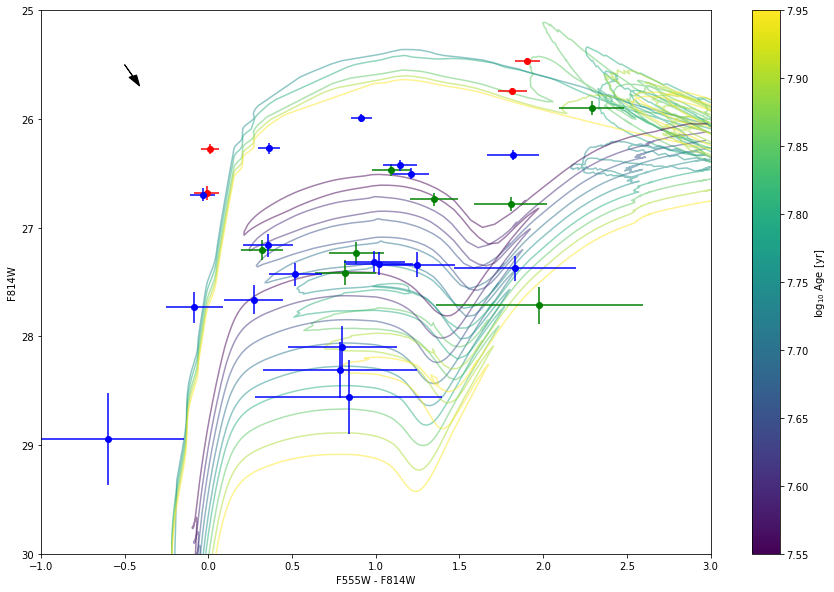

In [12]:
# fix metallicity, vary age
df = isochrones[0]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}


ages = ages[(ages > 7.5) & (ages < 8)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Two adjustments: 1. Distance: added to mag 2. Extinction: added to both.
    F814W_ext = 0.061 # extinction in F814W in NGC 1309 from NED
    mag = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    color = df[idx].ACS_WFC_F555W - df[idx].ACS_WFC_F814W + F555W_ext - F814W_ext + (2.792 - 1.526)*Gal_ext
    age_cmd[age] = (color, mag)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
# Plots stars
line1 = plt.errorbar(F555W_F1 - F814W_F1, F814W_F1, fmt='ro', xerr=xerr2_F1, yerr=yerr2_F1)
line2 = plt.errorbar(F555W_F2 - F814W_F2, F814W_F2, fmt='go', xerr=xerr2_F2, yerr=yerr2_F2)
line3 = plt.errorbar(F555W_F3 - F814W_F3, F814W_F3, fmt='bo', xerr=xerr2_F3, yerr=yerr2_F3)
#plt.plot(F555W_F1 - F814W_F1, F814W_F1, 'ro', F555W_F2 - F814W_F2, F814W_F2, 'go', F555W_F3 - F814W_F3, F814W_F3, 'bo')
# Plots reddening vector
plt.arrow(-0.5, 25.5, (2.219 - 1.526)*Gal_ext, 1.526*Gal_ext, head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlabel("F555W - F814W")
plt.ylabel("F814W")
plt.ylim(30,25)
plt.xlim(-1, 3)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')

# Removing clusters

In [13]:
# Using IRAF to compute actual concentration index, i.e. photometry at .5 pixels to photometry at 3 pixels
ascii_1 = open("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2012z/acs_f555w_all_drc.fits1.mag.1")
ascii_2 = open("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2012z/acs_f555w_all_drc.fits1.mag.2")
text_1 = ascii_1.readlines()
text_2 = ascii_2.readlines()

concentration = np.zeros(45)
for i in range(45):
    if mysplit(text_1[5*i + 79])[4] == 'INDEF': # Removes objects with no defined magnitude at .5 pixels
        concentration[i] = 99
    elif mysplit(text_2[5*i + 79])[4] == 'INDEF': # Removes objects with no defined magnitude at 3 pixels
        concentration[i] = -99
    else: concentration[i] = float(mysplit(text_1[5*i + 79])[4]) - float(mysplit(text_2[5*i + 79])[4])
ascii_1.close()
ascii_2.close()

In [14]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2012z_200pc.reg", "r+")
text = asci.readlines()

region = np.zeros([45,2])
for i in range(45):
    A = mysplit(text[i+3], ' # ')
    region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
    region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]

# Info for each star chosen as real 
info = np.zeros([region.shape[0],info_predict.shape[1]])

j = 0 # Iteration variable for region array
for i in range(info_predict.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == pos_predict[i][0])&(region[j][1] == pos_predict[i][1]):
        info[j] = info_predict[i]
        j = j + 1
        if j == region.shape[0]: break

(30, 26)

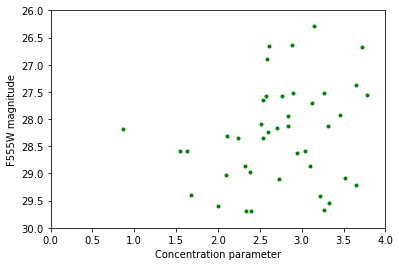

In [15]:
# Plots the concentration parameter vs magnitude
plt.plot(concentration, info[:,28], 'g.')
plt.xlabel('Concentration parameter')
plt.ylabel('F555W magnitude')
plt.xlim(0,4)
plt.ylim(30,26)

In [16]:
# Cut out clusters (identified as objects with concentration parameter < 2.3, from Chandar et. al. 2010)
new_info = np.zeros(info.shape)
for i in range(45):
    if (concentration[i] < 2.3): # & (concentration[i] >= 0):
        new_info[i] = info[i]
new_info = new_info[~np.all(new_info == 0, axis=1)]

In [17]:
np.savetxt("New_Start(2017)/sn2012z_NoClustersROI.reg", new_info[:,2:4], '%5.2f')

In [18]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2012z_NoClustersROI_133pc.reg", "r+")
text = asci.readlines()
region = np.zeros([45,2])

for i in range(2):
    region[i][0] = mysplit(text[i])[0]
    region[i][1] = mysplit(text[i])[1]
region = region[~np.all(region == 0, axis=1)]

new_info1 = np.copy(new_info) # Will hold stars within 200 parsecs
new_info2 = np.zeros([region.shape[0], new_info.shape[1]]) # Will hold stars within 133 parsecs

j = 0 # Iteration variable for region array
for i in range(new_info.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == new_info[i][2])&(region[j][1] == new_info[i][3]):
        new_info2[j] = new_info[i]
        j = j + 1
        if j == region.shape[0]: break
              
                
for i in range(new_info1.shape[0]):
    for j in range(new_info2.shape[0]):
        if np.array_equal(new_info1[i],new_info2[j]):
            new_info1[i] = np.zeros(new_info1[i].size)
            
new_info1 = new_info1[~np.all(new_info1 == 0, axis=1)]
new_info2 = new_info2[~np.all(new_info2 == 0, axis=1)]

In [19]:
# Reddening, metallicity, and distance errors
dist_lower = 5 * (np.log10(31.96e6 - .81e6) - 1)
dist_upper = 5 * (np.log10(31.96e6 + .81e6) - 1)
red_lower = 0.07
red_upper = 0.07
metal_lower = 0
metal_upper = 0

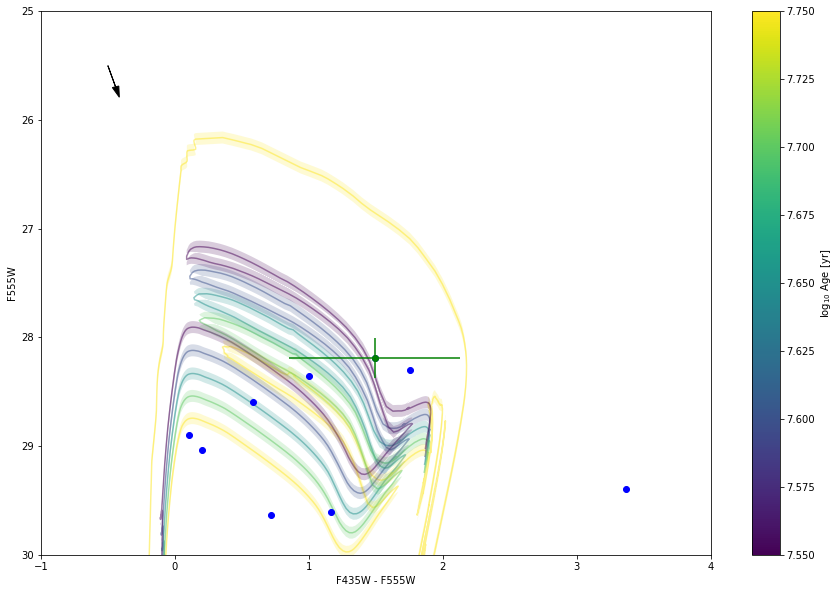

In [20]:
# fix metallicity, vary age
df = isochrones[0]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}

ages = ages[(ages > 7.5) & (ages < 7.8)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Three adjustments: 1. Distance: added to mag 2. MW Extinction: added to both. 3. Galactic extinction
    dist_adjust = 5 * (np.log10(31.96e6) - 1)
    F435W_ext = 0.144 # extinction in F435W in NGC 1309 from NED
    F555W_ext = 0.112 # extinction in F555W in NGC 1309 from NED
    Gal_ext = 0.07
    # Multiply Gal_ext by A_lambda/E(B-V) values from Schlafly, Finkbeiner 2011
    mag = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    mag_lower = df[idx].ACS_WFC_F555W + dist_lower + F555W_ext + 2.792*red_lower
    mag_upper = df[idx].ACS_WFC_F555W + dist_upper + F555W_ext + 2.792*red_upper
    color = df[idx].ACS_WFC_F435W - df[idx].ACS_WFC_F555W  + F435W_ext - F555W_ext + (3.610 - 2.792) * Gal_ext
    age_cmd[age] = (color, mag, mag_lower, mag_upper)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag, mag_lower, mag_upper) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
    plt.fill_between(color, mag_lower, mag_upper, facecolor=sm.to_rgba(age), alpha=0.2, edgecolor='none')
    
# Plots stars
#line1 = plt.errorbar(new_info3[:,15] - new_info3[:,28], new_info3[:,28], fmt='ro', 
#                     xerr=np.sqrt(new_info3[:,17]**2 + new_info3[:,30]**2), yerr=new_info3[:,30])
line2 = plt.errorbar(new_info2[:,15] - new_info2[:,28], new_info2[:,28], fmt='go', 
                     xerr=np.sqrt(new_info2[:,17]**2 + new_info2[:,30]**2), yerr=new_info2[:,30])
line3 = plt.plot(new_info[:,15] - new_info[:,28], new_info[:,28], 'bo')

# Plots reddening vector
plt.arrow(-0.5, 25.5, (3.610 - 2.792)*Gal_ext, 2.792*Gal_ext, head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlabel("F435W - F555W")
plt.ylabel("F555W")
plt.ylim(30,25)
plt.xlim(-1, 4)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')
plt.draw()
plt.show()

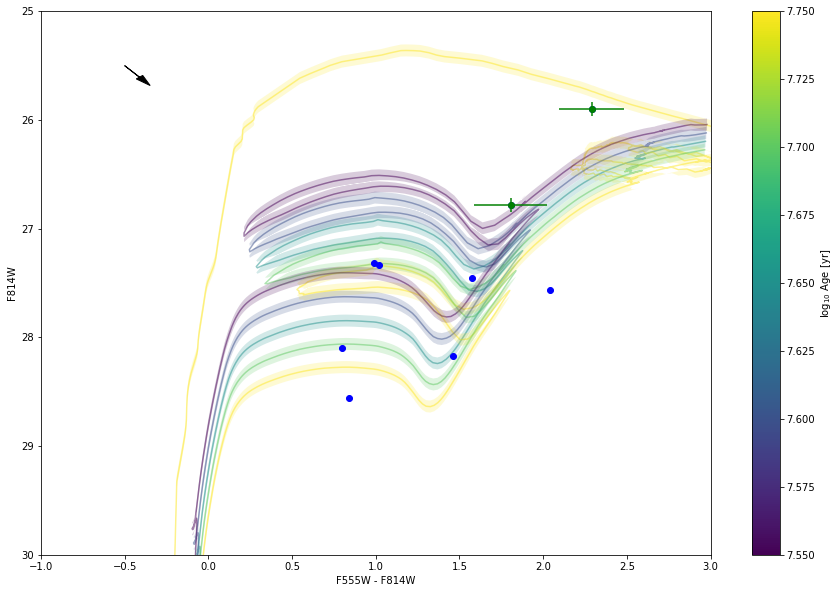

In [21]:
# fix metallicity, vary age
df = isochrones[0]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}


ages = ages[(ages > 7.5) & (ages < 7.8)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Two adjustments: 1. Distance: added to mag 2. Extinction: added to both.
    F814W_ext = 0.061 # extinction in F814W in NGC 1309 from NED
    mag = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    mag_lower = df[idx].ACS_WFC_F814W + dist_lower + F814W_ext + 1.526*red_lower
    mag_upper = df[idx].ACS_WFC_F814W + dist_upper + F814W_ext + 1.526*red_upper    
    color = df[idx].ACS_WFC_F555W - df[idx].ACS_WFC_F814W + F555W_ext - F814W_ext + (2.792 - 1.526)*Gal_ext
    age_cmd[age] = (color, mag, mag_lower, mag_upper)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag, mag_lower, mag_upper) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
    plt.fill_between(color, mag_lower, mag_upper, facecolor=sm.to_rgba(age), alpha=0.2, edgecolor='none')
    
# Plots stars
#line1 = plt.errorbar(new_info3[:,28] - new_info3[:,41], new_info3[:,41], fmt='ro', 
#                     xerr=np.sqrt(new_info3[:,30]**2 + new_info3[:,43]**2), yerr=new_info3[:,43])
line2 = plt.errorbar(new_info2[:,28] - new_info2[:,41], new_info2[:,41], fmt='go', 
                     xerr=np.sqrt(new_info2[:,30]**2 + new_info2[:,43]**2), yerr=new_info2[:,43])
line3 = plt.plot(new_info[:,28] - new_info[:,41], new_info[:,41], 'bo')

# Plots reddening vector
plt.arrow(-0.5, 25.5, (2.792 - 1.526)*Gal_ext, 1.526*Gal_ext, head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlabel("F555W - F814W")
plt.ylabel("F814W")
plt.ylim(30,25)
plt.xlim(-1, 3)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')

## Crappy Chi-Squared Test

In [22]:
print(new_info.shape)

(10, 414)


There are  4.0 stars above signal-to-noise of 10, and  5.0 stars below.


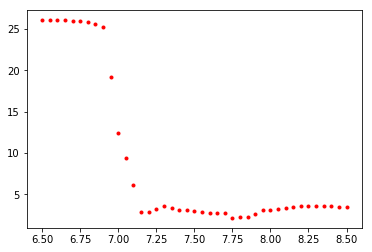

In [53]:
# Reruns through the isochrones the user specifies to get mags, colors, etc.
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()
ages = ages[(ages >= 6.5) & (ages <= 8.5)]

Gal_ext = 0.04 + 4 * (1/3) * (.11 - .04)
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    mag_435 = df[idx].ACS_WFC_F435W + dist_adjust + F435W_ext + 3.610*Gal_ext
    mag_555 = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    mag_814 = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    age_cmd[age] = (mag_435, mag_555, mag_814)
n_ages = i + 1


SN_pos = np.array([1968.4213, 2258.4613])

CChi = np.zeros([2,n_ages]) # This is the array which measure crappy chi-squared across all filters
k = 0
n10SN = 0
nlow = 0
for age, (mag_435, mag_555, mag_814) in age_cmd.items():
    phys_dist_temp = 0 # This will hold the total physical distance weights to be averaged and divided out to normalize
    temp = 0 # This will hold the distance for each data point to the line
    
    # Sets the radial dispersion for the region
    sigma = 5 * (.92 * 10**age * 3.15e7 * 206265)/(31.96e6 * 3.086e13 * .05) # Replace 10**age w/ 10000000
    flat = (100 * 206265)/(31.96e6 * .05) # 100 parsecs in pixels
    flat_int = int(np.round(flat*5))
    for j in range(new_info.shape[0]):
        # Removes "stars" with mag > 90 in any band
        if (new_info[j,15] > 90) or (new_info[j,28] > 90) or (new_info[j,41] > 90):
            continue
        if new_info[j,5] >= 10:
            n10SN += 1
        else: nlow += 1
        
        # Uses physical distance between star and SN position to weight each star
        phys_dist = np.sqrt((SN_pos[0] - new_info[j,2])**2 + (SN_pos[1] - new_info[j,3])**2)
        weight_func = np.convolve(1/(np.sqrt(2 * np.pi) * sigma) * np.exp(- np.linspace(-200,200,2000)**2/(2 * sigma**2)),
               np.append(np.zeros(int(np.ceil((2000-flat_int)/2))),np.append(np.ones(flat_int),np.zeros(int(np.floor((2000-flat_int)/2))))))
        phys_dist_weight = weight_func[1999 + int(phys_dist*5)]
        phys_dist_temp += phys_dist_weight # Will be used to compute average of the weights
        
        # Adds the difference in mags for each data point in quadrature.
        #temp += phys_dist_weight * np.amin((new_info[j,15] - mag_435)**2/mag_435 + (new_info[j,28] - mag_555)**2/mag_555
        #                + (new_info[j,41] - mag_625)**2/mag_625 + (new_info[j,54] - mag_814)**2/mag_814)
        temp += (phys_dist_weight * np.amin(np.sqrt((new_info[j,15] - mag_435)**2
          + (new_info[j,28] - mag_555)**2 + (new_info[j,41] - mag_814)**2)))**2
    
    # There are eleven stars removed not counted, as they have >90 mag in some filter
    phys_dist_temp /= (new_info.shape[0] - 1)
    CChi[0,k] = age
    CChi[1,k] = np.sqrt(temp)/phys_dist_temp
    k = k + 1
    
# Ensures that the crappy chi-squared arrays are ordered by age for convenience.
CChi = CChi.T[CChi.T[:,0].argsort()]
plt.plot(CChi.T[0], CChi.T[1], 'r.')
print("There are ", n10SN/n_ages, "stars above signal-to-noise of 10, and ", nlow/n_ages, "stars below.")

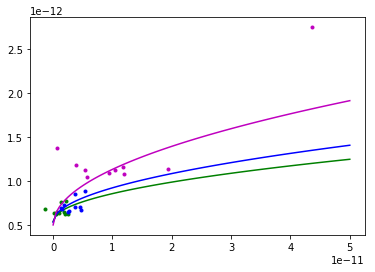

In [24]:
# Testing to find relationship between flux and flux error
x_array=np.linspace(0, 5e-11, num=100)

plt.plot(new_info[:,13], new_info[:,14], 'g.')
plt.plot(x_array, 5.4e-13 + 1e-7*np.sqrt(x_array), 'g-')
plt.plot(new_info[:,26], new_info[:,27], 'b.')
plt.plot(x_array, 5.3e-13 + 1.24e-7*np.sqrt(x_array), 'b-')
plt.plot(new_info[:,39], new_info[:,40], 'm.')
plt.plot(x_array, 5e-13 + 2e-7*np.sqrt(x_array), 'm-')

In [25]:
# Set up the fitting functions as skew normal distributions
from scipy.optimize import curve_fit
from scipy.stats import skewnorm
import scipy.integrate as integrate

# This is the function which will be fed to the fitting algorithm.
def skew(x, norm, a, loc, scale):
    return norm * skewnorm.pdf(x, a, loc=loc, scale=scale)

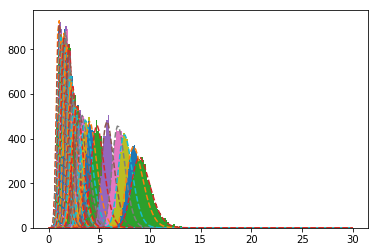

In [45]:
# This cell and the one below are for a full run fit in magnitudes rather than flux, and sigma ~ 10**age
x = np.linspace(0,30,200)
probs1 = []
for i, age in enumerate(ages):
    filename="MC_12Z_MagFit_1498243615.0/CChi_false_{Age}_0.04.npy".format(Age=np.round(age,decimals=2))
    CChi_false = np.load(filename)
    CChi_false[1,:] = CChi_false[1,:]
    halt = False
    for j in range(5000):
        if np.isinf(CChi_false[1,j]):
            CChi_false[1,j] = 999999999999
            halt = True
            continue
    if halt == True:
        probs1.append(0)
        continue
    y = plt.hist(CChi_false[1,:], bins=np.linspace(0,30,201))[0]
    popt, pcov = curve_fit(skew, x, y, p0=(2000, 3, 2, 2))
    plt.plot(x, skew(x, *popt), '--')
    norm = integrate.quad(skew, 0, 30, args=(popt[0], popt[1], popt[2], popt[3]))[0]
    probs1.append(skew(CChi[i,1], *popt)/norm)

7.7


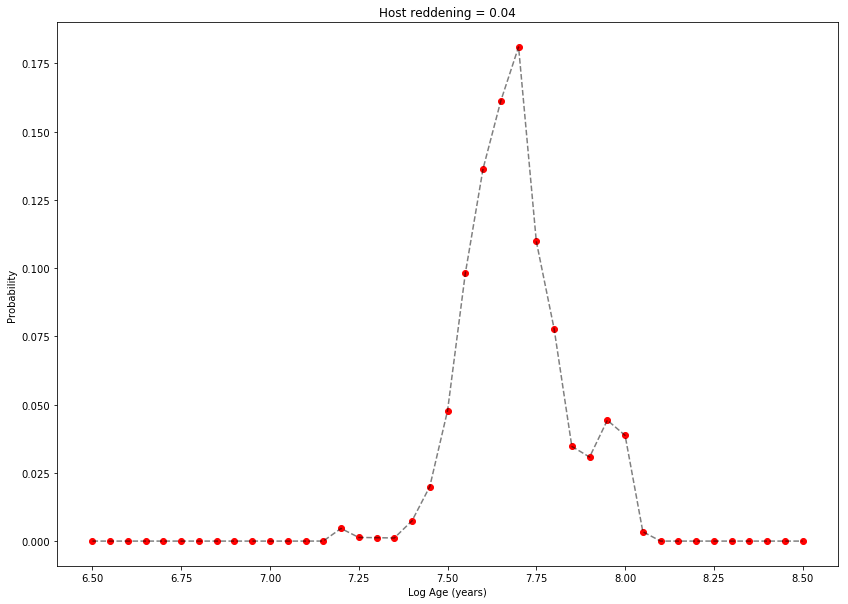

In [46]:
norm1 = np.sum(probs1)
plt.figure(figsize=(14,10));
plt.plot(CChi[:,0], probs1/norm1, 'ro')
plt.plot(CChi[:,0], probs1/norm1, 'k--', alpha=.5)
plt.ylabel("Probability")
plt.xlabel("Log Age (years)")
plt.title("Host reddening = 0.04")
print(CChi[:,0][np.argmax(probs1)])

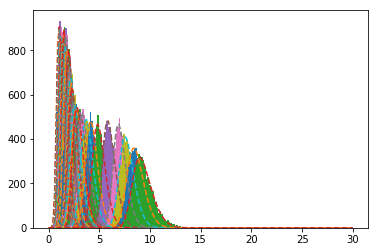

In [48]:
# This cell and the one below are for a full run fit in magnitudes rather than flux, and sigma ~ 10**age
x = np.linspace(0,30,200)
probs2 = []
for i, age in enumerate(ages):
    filename="MC_12Z_MagFit_1498243615.0/CChi_false_{Age}_0.06.npy".format(Age=np.round(age,decimals=2))
    CChi_false = np.load(filename)
    CChi_false[1,:] = CChi_false[1,:]
    halt = False
    for j in range(5000):
        if np.isinf(CChi_false[1,j]):
            CChi_false[1,j] = 999999999999
            halt = True
            continue
    if halt == True:
        probs2.append(0)
        continue
    y = plt.hist(CChi_false[1,:], bins=np.linspace(0,30,201))[0]
    popt, pcov = curve_fit(skew, x, y, p0=(2000, 3, 2, 2))
    plt.plot(x, skew(x, *popt), '--')
    norm = integrate.quad(skew, 0, 30, args=(popt[0], popt[1], popt[2], popt[3]))[0]
    probs2.append(skew(CChi[i,1], *popt)/norm)

7.7


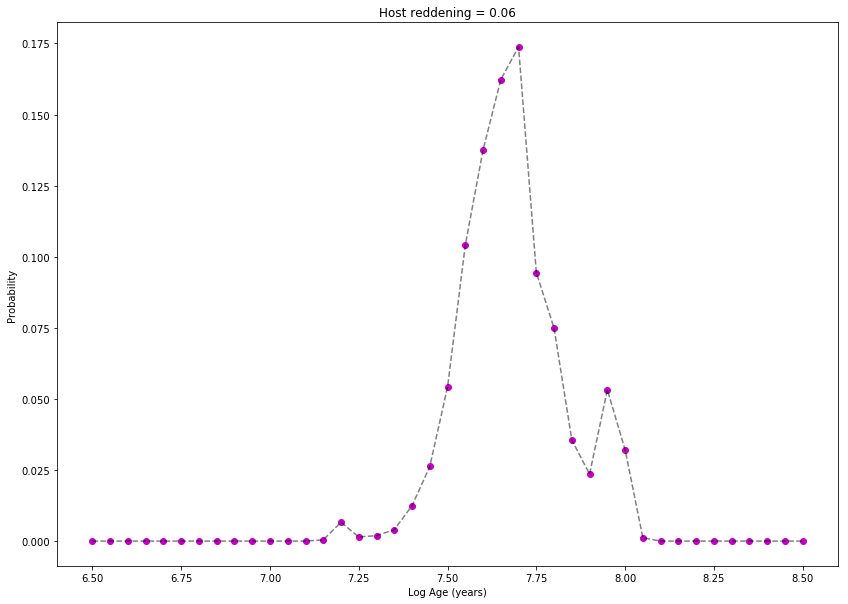

In [49]:
norm2 = np.sum(probs2)
plt.figure(figsize=(14,10));
plt.plot(CChi[:,0], probs2/norm2, 'mo')
plt.plot(CChi[:,0], probs2/norm2, 'k--', alpha=.5)
plt.ylabel("Probability")
plt.xlabel("Log Age (years)")
plt.title("Host reddening = 0.06")
np.save("New_Start(2017)/12Z_Mag_probs", probs2)
print(CChi[:,0][np.argmax(probs2)])

//anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in double_scalars


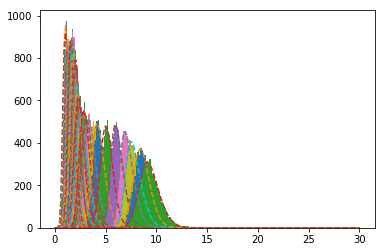

In [51]:
# This cell and the one below are for a full run fit in magnitudes rather than flux, and sigma ~ 10**age
x = np.linspace(0,30,200)
probs3 = []
for i, age in enumerate(ages):
    filename="MC_12Z_MagFit_1498243615.0/CChi_false_{Age}_0.09.npy".format(Age=np.round(age,decimals=2))
    CChi_false = np.load(filename)
    CChi_false[1,:] = CChi_false[1,:]
    halt = False
    for j in range(5000):
        if np.isinf(CChi_false[1,j]):
            CChi_false[1,j] = 999999999999
            halt = True
            continue
    if halt == True:
        probs3.append(0)
        continue
    y = plt.hist(CChi_false[1,:], bins=np.linspace(0,30,201))[0]
    popt, pcov = curve_fit(skew, x, y, p0=(2000, 3, 2, 2))
    plt.plot(x, skew(x, *popt), '--')
    norm = integrate.quad(skew, 0, 30, args=(popt[0], popt[1], popt[2], popt[3]))[0]
    probs3.append(skew(CChi[i,1], *popt)/norm)

7.7


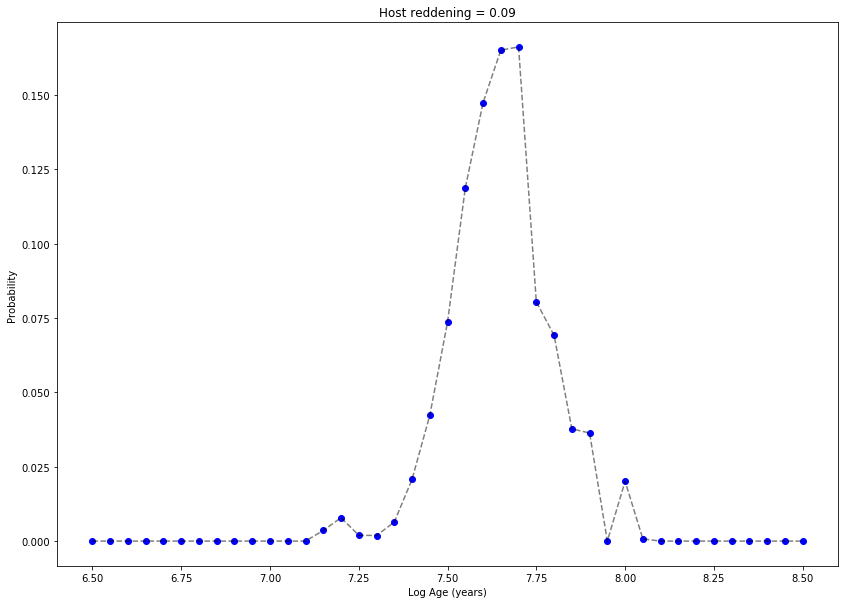

In [52]:
for i in range(len(probs3)):
    if np.isnan(probs3[i]):
        probs3[i] = 0
norm3 = np.sum(probs3)
plt.figure(figsize=(14,10));
plt.plot(CChi[:,0], probs3/norm3, 'bo')
plt.plot(CChi[:,0], probs3/norm3, 'k--', alpha=.5)
plt.ylabel("Probability")
plt.xlabel("Log Age (years)")
plt.title("Host reddening = 0.09")
print(CChi[:,0][np.argmax(probs3)])

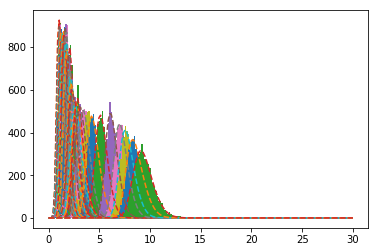

In [54]:
# This cell and the one below are for a full run fit in magnitudes rather than flux, and sigma ~ 10**age
x = np.linspace(0,30,200)
probs4 = []
for i, age in enumerate(ages):
    filename="MC_12Z_MagFit_1498243615.0/CChi_false_{Age}_0.11.npy".format(Age=np.round(age,decimals=2))
    CChi_false = np.load(filename)
    CChi_false[1,:] = CChi_false[1,:]
    halt = False
    for j in range(5000):
        if np.isinf(CChi_false[1,j]):
            CChi_false[1,j] = 999999999999
            halt = True
            continue
    if halt == True:
        probs4.append(0)
        continue
    y = plt.hist(CChi_false[1,:], bins=np.linspace(0,30,201))[0]
    popt, pcov = curve_fit(skew, x, y, p0=(2000, 3, 2, 2))
    plt.plot(x, skew(x, *popt), '--')
    norm = integrate.quad(skew, 0, 30, args=(popt[0], popt[1], popt[2], popt[3]))[0]
    probs4.append(skew(CChi[i,1], *popt)/norm)

7.7


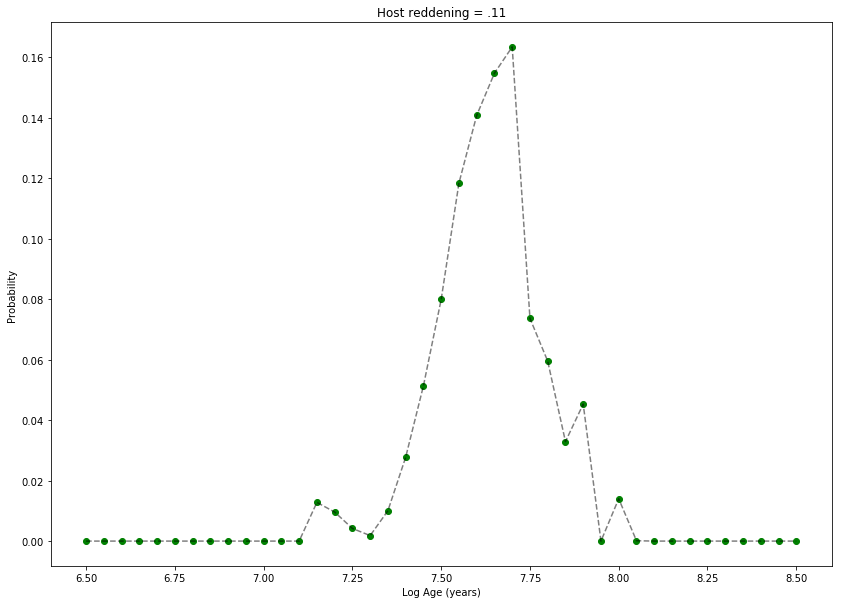

In [56]:
# Comparing relative probabilities of each host reddening
plt.figure(figsize=(14,10));
plt.plot(CChi[:,0], probs4/norm4, 'go')
plt.plot(CChi[:,0], probs4/norm4, 'k--', alpha=.5)
plt.ylabel("Probability")
plt.xlabel("Log Age (years)")
plt.title("Host reddening = .11")
print(CChi[:,0][np.argmax(probs4)])

3.71398965469 3.88848976347 3.85145954318 4.1173619663


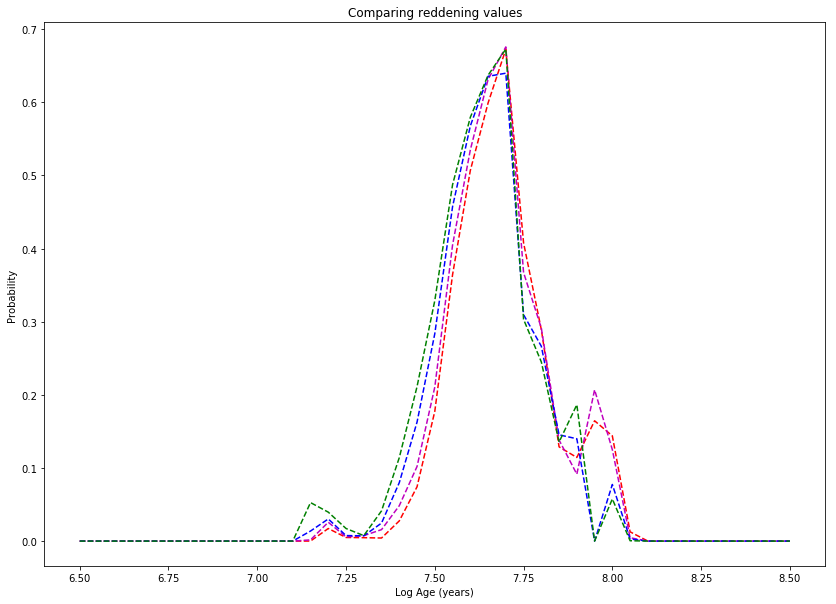

In [55]:
norm4 = np.sum(probs4)
plt.figure(figsize=(14,10));
plt.plot(CChi[:,0], probs1, 'r--', CChi[:,0], probs2, 'm--', CChi[:,0], probs3, 'b--', CChi[:,0], probs4, 'g--')
plt.ylabel("Probability")
plt.xlabel("Log Age (years)")
plt.title("Comparing reddening values")
print(norm1, norm2, norm3, norm4)

## Some Junk Below Here

[ 30.   -2.5   0. ]


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


(30, 26)

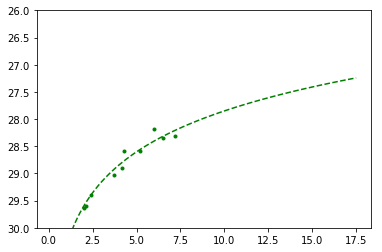

In [144]:
from scipy.optimize import curve_fit
def fitFunc(x, a, b, c):
    return a + b * np.log10(x - c)
  
x_array = np.linspace(0,17.5,100)
popt, pcov = curve_fit(fitFunc, new_info[:,19], new_info[:,15], p0=(30, -2.5, 0))
print(popt)

#plt.plot(new_info[:,19], new_info[:,15], 'b.')
#plt.plot(x_array, fitFunc(x_array, 30.4, -2.5, 0), 'b--')
plt.plot(new_info[:,32], new_info[:,28], 'g.')
plt.plot(x_array, fitFunc(x_array, 30.35, -2.5, 0), 'g--')
#plt.plot(new_info[:,45], new_info[:,41], 'r.')
#plt.plot(x_array, fitFunc(x_array, 29.9, -2.5, 0), 'r--')
plt.ylim(30,26)

(0, 1)

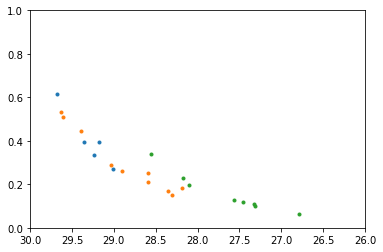

In [149]:
plt.plot(new_info[:,15], new_info[:,17], '.')
plt.plot(new_info[:,28], new_info[:,30], '.')
plt.plot(new_info[:,41], new_info[:,43], '.')
plt.xlim(30,26)
plt.ylim(0,1)

(0, 2)

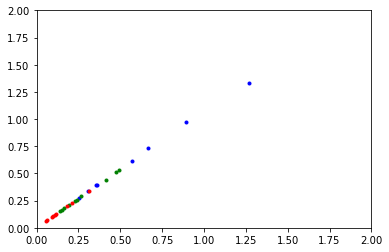

In [161]:
plt.plot(new_info[:,14]/new_info[:,13], new_info[:,17], 'b.')
plt.plot(new_info[:,27]/new_info[:,26], new_info[:,30], 'g.')
plt.plot(new_info[:,40]/new_info[:,39], new_info[:,43], 'r.')
plt.ylim(0,2)
plt.xlim(0,2)